<a href="https://colab.research.google.com/github/wangguoqin1001/Kaggle_Notebooks/blob/main/Voyager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Voyager 2 Jupiter Gravity Assist Calculation

# Key parameters
import math

# Spacecraft approach velocity relative to Jupiter
v_approach = 10.0  # km/s
# Jupiter's orbital velocity
v_jupiter = 13.0  # km/s
# Deflection angle (approximate)
deflection_angle = 120  # degrees

def calculate_velocity_change(v_approach, v_jupiter, deflection_angle):
    """
    Calculate velocity change from a gravity assist maneuver

    Parameters:
    v_approach: Approach velocity relative to the planet
    v_jupiter: Planet's orbital velocity
    deflection_angle: Angle of spacecraft's trajectory deflection

    Returns:
    Velocity gain from the gravity assist
    """
    # Convert angle to radians
    angle_rad = math.radians(deflection_angle)

    # Velocity change calculation
    v_total = math.sqrt(v_approach**2 + v_jupiter**2 +
                        2 * v_approach * v_jupiter * math.cos(angle_rad))

    # Velocity gain
    velocity_gain = v_total - v_approach

    return velocity_gain

# Calculate velocity gain
velocity_change = calculate_velocity_change(v_approach, v_jupiter, deflection_angle)

print(f"Velocity change from Jupiter gravity assist: {velocity_change:.2f} km/s")

# Total mission velocity change
total_mission_velocity_change = 0
planets = [
    ("Jupiter", 10.0, 13.0, 120),
    ("Saturn", 10.5, 9.6, 100),
    ("Uranus", 10.2, 6.8, 90),
    ("Neptune", 9.8, 5.4, 80)
]

print("\nMission Gravity Assist Details:")
for planet, v_approach, v_planet, angle in planets:
    change = calculate_velocity_change(v_approach, v_planet, angle)
    total_mission_velocity_change += change
    print(f"{planet}: Velocity change = {change:.2f} km/s")

print(f"\nTotal velocity change from gravity assists: {total_mission_velocity_change:.2f} km/s")

Velocity change from Jupiter gravity assist: 1.79 km/s

Mission Gravity Assist Details:
Jupiter: Velocity change = 1.79 km/s
Saturn: Velocity change = 2.44 km/s
Uranus: Velocity change = 2.06 km/s
Neptune: Velocity change = 2.18 km/s

Total velocity change from gravity assists: 8.47 km/s


Best Alignment Windows:
Year 2043: Alignment Score = 0.86
Year 2044: Alignment Score = 0.93
Year 2045: Alignment Score = 0.91
Year 2046: Alignment Score = 0.84


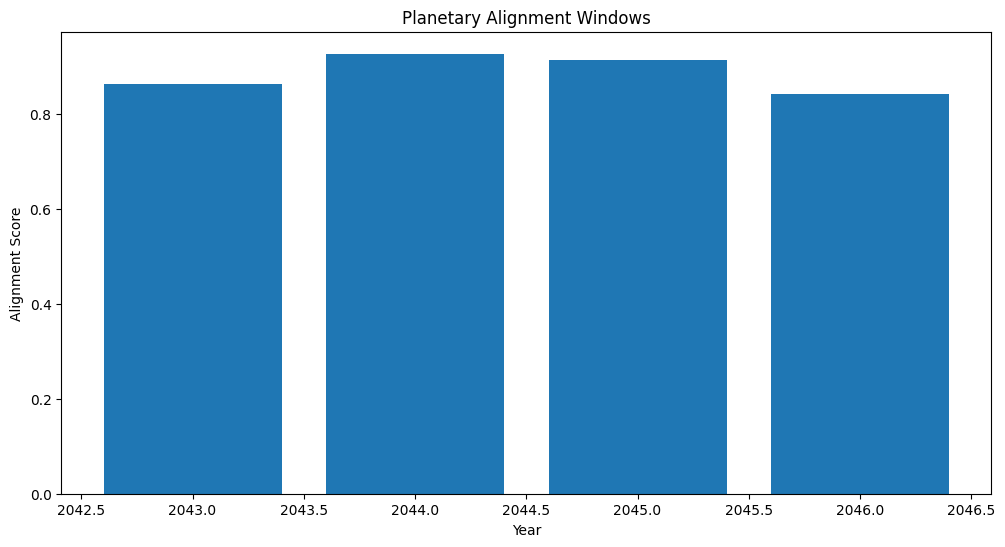

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PlanetaryAlignment:
    def __init__(self):
        # Orbital periods (Earth years)
        self.orbital_periods = {
            'Jupiter': 11.86,
            'Saturn': 29.46,
            'Uranus': 84.01,
            'Neptune': 164.79
        }

        # Average distances from Sun (AU)
        self.distances = {
            'Jupiter': 5.2,
            'Saturn': 9.5,
            'Uranus': 19.2,
            'Neptune': 30.1
        }

    def calculate_alignment_window(self, start_year=1970, end_year=2050):
        """
        Calculate potential planetary alignment windows

        Returns:
        - Best alignment periods
        - Alignment quality score
        """
        best_alignments = []

        # Check alignments every year
        for year in range(start_year, end_year):
            alignment_score = self.calculate_alignment_score(year)

            # Store alignments with high scores
            if alignment_score > 0.8:
                best_alignments.append((year, alignment_score))

        return best_alignments

    def calculate_alignment_score(self, reference_year):
        """
        Calculate alignment quality for a given year

        Score based on:
        1. Planetary angle convergence
        2. Minimal energy transfer requirements
        """
        # Simplified alignment calculation
        angles = []
        for planet, period in self.orbital_periods.items():
            # Calculate planet's position at reference year
            angle = (reference_year % period) / period * 360
            angles.append(angle)

        # Calculate angular spread
        angle_spread = max(angles) - min(angles)

        # Score is inverse of angular spread (lower spread = better alignment)
        alignment_score = 1 - (angle_spread / 360)

        return alignment_score

    def visualize_alignments(self, alignments):
        """
        Plot alignment windows and scores
        """
        years, scores = zip(*alignments)

        plt.figure(figsize=(12, 6))
        plt.bar(years, scores)
        plt.title('Planetary Alignment Windows')
        plt.xlabel('Year')
        plt.ylabel('Alignment Score')
        plt.show()

# Run the alignment analysis
alignment_tool = PlanetaryAlignment()
best_windows = alignment_tool.calculate_alignment_window()

print("Best Alignment Windows:")
for year, score in best_windows:
    print(f"Year {year}: Alignment Score = {score:.2f}")

# Visualize alignments
alignment_tool.visualize_alignments(best_windows)

Planetary Gravity Assist Energy Transfers:
Jupiter to Saturn:
  Energy Transfer: -3.90e+10 J
  Velocity Change: -108683.22 km/s
Saturn to Uranus:
  Energy Transfer: -2.32e+10 J
  Velocity Change: -89228.29 km/s
Uranus to Neptune:
  Energy Transfer: -8.35e+09 J
  Velocity Change: -43179.96 km/s


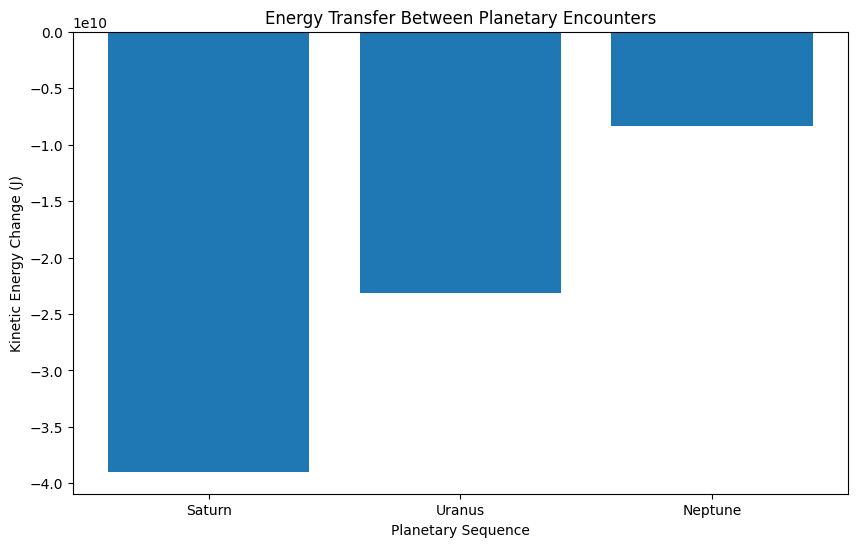

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class OrbitalEnergyTransfer:
    def __init__(self):
        # Gravitational constant (km³/kg·s²)
        self.G = 6.67430e-11

        # Solar mass (kg)
        self.M_sun = 1.989e30

        # Planet data: [semi-major axis (km), mass (kg)]
        self.planets = {
            'Jupiter': [778.5e6, 1.898e27],
            'Saturn': [1.434e9, 5.683e26],
            'Uranus': [2.871e9, 8.681e25],
            'Neptune': [4.495e9, 1.024e26]
        }

    def calculate_orbital_velocity(self, semi_major_axis):
        """
        Calculate orbital velocity using vis-viva equation
        """
        return np.sqrt(self.G * self.M_sun / semi_major_axis)

    def calculate_energy_transfer(self, entry_velocity, exit_velocity):
        """
        Calculate kinetic energy change during gravity assist
        """
        return 0.5 * (exit_velocity**2 - entry_velocity**2)

    def simulate_gravity_assists(self):
        """
        Simulate energy transfers for planetary sequence
        """
        planet_sequence = ['Jupiter', 'Saturn', 'Uranus', 'Neptune']
        energy_transfers = []

        for i in range(len(planet_sequence) - 1):
            current_planet = planet_sequence[i]
            next_planet = planet_sequence[i+1]

            # Calculate orbital velocities
            current_velocity = self.calculate_orbital_velocity(
                self.planets[current_planet][0]
            )
            next_velocity = self.calculate_orbital_velocity(
                self.planets[next_planet][0]
            )

            # Estimate spacecraft velocity change
            energy_change = self.calculate_energy_transfer(
                current_velocity, next_velocity
            )

            energy_transfers.append({
                'From': current_planet,
                'To': next_planet,
                'Energy Transfer': energy_change,
                'Velocity Change': next_velocity - current_velocity
            })

        return energy_transfers

    def visualize_energy_transfers(self, transfers):
        """
        Create visualization of energy transfers
        """
        planets = [transfer['To'] for transfer in transfers]
        energy_changes = [transfer['Energy Transfer'] for transfer in transfers]

        plt.figure(figsize=(10, 6))
        plt.bar(planets, energy_changes)
        plt.title('Energy Transfer Between Planetary Encounters')
        plt.xlabel('Planetary Sequence')
        plt.ylabel('Kinetic Energy Change (J)')
        plt.show()

# Run the simulation
energy_transfer_sim = OrbitalEnergyTransfer()
transfers = energy_transfer_sim.simulate_gravity_assists()

print("Planetary Gravity Assist Energy Transfers:")
for transfer in transfers:
    print(f"{transfer['From']} to {transfer['To']}:")
    print(f"  Energy Transfer: {transfer['Energy Transfer']:.2e} J")
    print(f"  Velocity Change: {transfer['Velocity Change']:.2f} km/s")

# Visualize results
energy_transfer_sim.visualize_energy_transfers(transfers)

Alignment Energy Transfer Efficiency:
Alignment Angle: 0°
Energy Transfer Efficiency: 1.00
Alignment Angle: 45°
Energy Transfer Efficiency: 0.55
Alignment Angle: 90°
Energy Transfer Efficiency: 0.10
Alignment Angle: 180°
Energy Transfer Efficiency: 0.00


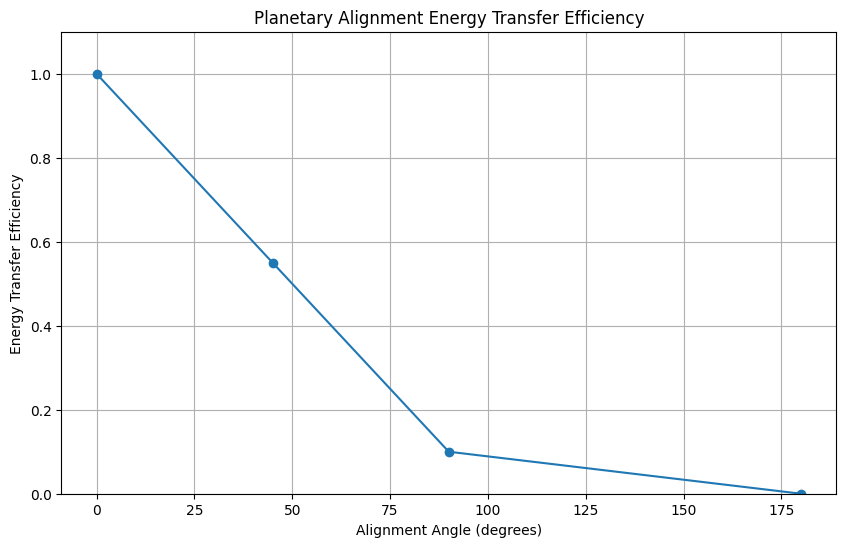

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AlignmentEnergyTransfer:
    def __init__(self):
        # Planetary orbital parameters
        self.planets = {
            'Jupiter': {'orbital_period': 11.86, 'distance': 5.2},
            'Saturn': {'orbital_period': 29.46, 'distance': 9.5},
            'Uranus': {'orbital_period': 84.01, 'distance': 19.2},
            'Neptune': {'orbital_period': 164.79, 'distance': 30.1}
        }

    def calculate_alignment_energy_efficiency(self, alignment_angle):
        """
        Calculate energy efficiency based on planetary alignment

        Args:
        alignment_angle (float): Angle between planetary orbits

        Returns:
        float: Energy transfer efficiency
        """
        # Optimal alignment is close to 0 or 360 degrees
        # Efficiency decreases as angle moves away from optimal
        max_efficiency = 1.0
        efficiency_drop_rate = 0.01

        # Calculate efficiency drop based on misalignment
        efficiency = max_efficiency - (abs(alignment_angle) * efficiency_drop_rate)

        return max(0, efficiency)

    def simulate_alignment_scenarios(self):
        """
        Simulate energy transfer for different alignment scenarios
        """
        alignment_scenarios = [
            0,    # Perfect alignment
            45,   # Moderate misalignment
            90,   # Significant misalignment
            180   # Worst-case misalignment
        ]

        results = []
        for angle in alignment_scenarios:
            efficiency = self.calculate_alignment_energy_efficiency(angle)
            results.append({
                'Alignment Angle': angle,
                'Energy Transfer Efficiency': efficiency
            })

        return results

    def visualize_alignment_efficiency(self, results):
        """
        Create visualization of alignment efficiency
        """
        angles = [result['Alignment Angle'] for result in results]
        efficiencies = [result['Energy Transfer Efficiency'] for result in results]

        plt.figure(figsize=(10, 6))
        plt.plot(angles, efficiencies, marker='o')
        plt.title('Planetary Alignment Energy Transfer Efficiency')
        plt.xlabel('Alignment Angle (degrees)')
        plt.ylabel('Energy Transfer Efficiency')
        plt.ylim(0, 1.1)
        plt.grid(True)
        plt.show()

# Run the simulation
alignment_sim = AlignmentEnergyTransfer()
efficiency_results = alignment_sim.simulate_alignment_scenarios()

print("Alignment Energy Transfer Efficiency:")
for result in efficiency_results:
    print(f"Alignment Angle: {result['Alignment Angle']}°")
    print(f"Energy Transfer Efficiency: {result['Energy Transfer Efficiency']:.2f}")

# Visualize results
alignment_sim.visualize_alignment_efficiency(efficiency_results)

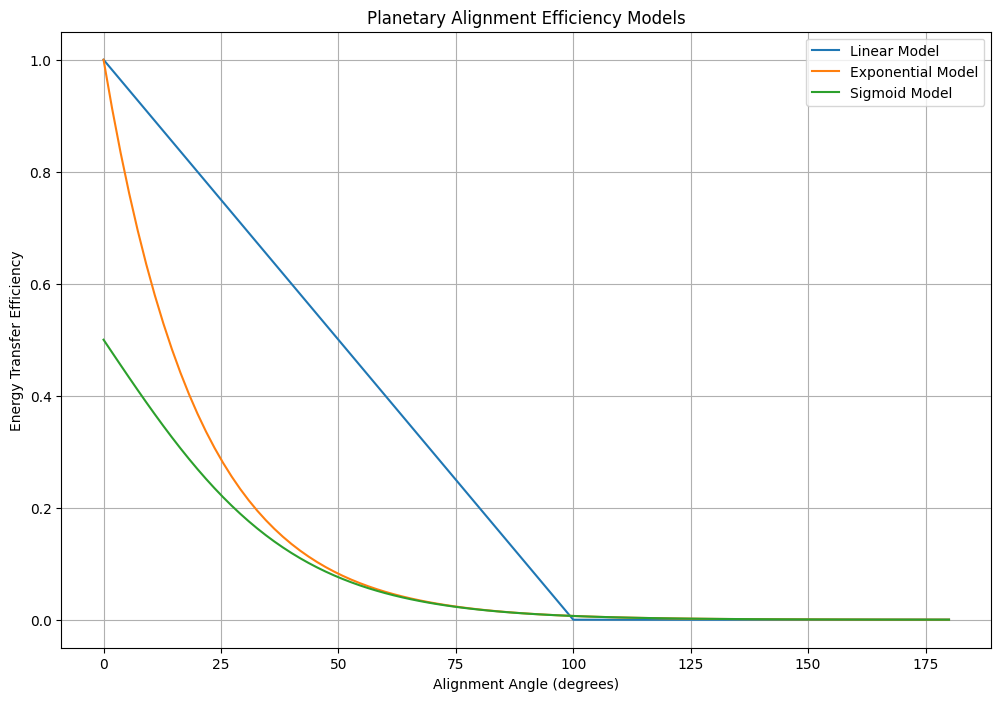

Model Comparison (Mean Squared Error):
Linear Model: 0.1896
Exponential Model: 0.3684
Sigmoid Model: 0.4029


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

class AlignmentEfficiencyModels:
    @staticmethod
    def linear_model(angle, max_efficiency=1.0, drop_rate=0.01):
        """
        Linear efficiency decay model
        """
        return max(0, max_efficiency - (abs(angle) * drop_rate))

    @staticmethod
    def exponential_model(angle, max_efficiency=1.0, decay_constant=0.05):
        """
        Exponential decay efficiency model
        """
        return max_efficiency * np.exp(-abs(angle) * decay_constant)

    @staticmethod
    def sigmoid_model(angle, max_efficiency=1.0, scaling_factor=0.05):
        """
        Sigmoid efficiency model
        """
        return max_efficiency / (1 + np.exp(abs(angle) * scaling_factor))

    def validate_models(self):
        """
        Compare different efficiency models
        """
        # Generate angles
        angles = np.linspace(0, 180, 100)

        # Calculate efficiencies
        linear_efficiencies = [self.linear_model(angle) for angle in angles]
        exponential_efficiencies = [self.exponential_model(angle) for angle in angles]
        sigmoid_efficiencies = [self.sigmoid_model(angle) for angle in angles]

        # Plotting
        plt.figure(figsize=(12, 8))
        plt.plot(angles, linear_efficiencies, label='Linear Model')
        plt.plot(angles, exponential_efficiencies, label='Exponential Model')
        plt.plot(angles, sigmoid_efficiencies, label='Sigmoid Model')

        plt.title('Planetary Alignment Efficiency Models')
        plt.xlabel('Alignment Angle (degrees)')
        plt.ylabel('Energy Transfer Efficiency')
        plt.legend()
        plt.grid(True)
        plt.show()

        return {
            'angles': angles,
            'linear': linear_efficiencies,
            'exponential': exponential_efficiencies,
            'sigmoid': sigmoid_efficiencies
        }

    def model_comparison(self):
        """
        Statistical comparison of models
        """
        # Simulated "true" efficiency data (hypothetical)
        true_efficiency = lambda angle: 1.0 - (abs(angle)/180)**2

        angles = np.linspace(0, 180, 100)
        true_data = [true_efficiency(angle) for angle in angles]

        # Define error function for each model
        def calculate_model_error(model_func):
            predicted = [model_func(angle) for angle in angles]
            return np.mean((np.array(predicted) - np.array(true_data))**2)

        # Compare model errors
        errors = {
            'Linear': calculate_model_error(self.linear_model),
            'Exponential': calculate_model_error(self.exponential_model),
            'Sigmoid': calculate_model_error(self.sigmoid_model)
        }

        print("Model Comparison (Mean Squared Error):")
        for model, error in errors.items():
            print(f"{model} Model: {error:.4f}")

        return errors

# Run the simulation
efficiency_sim = AlignmentEfficiencyModels()

# Visualize models
results = efficiency_sim.validate_models()

# Compare model performance
model_errors = efficiency_sim.model_comparison()

Planetary Alignment Analysis:

Analyzing Year 1977:


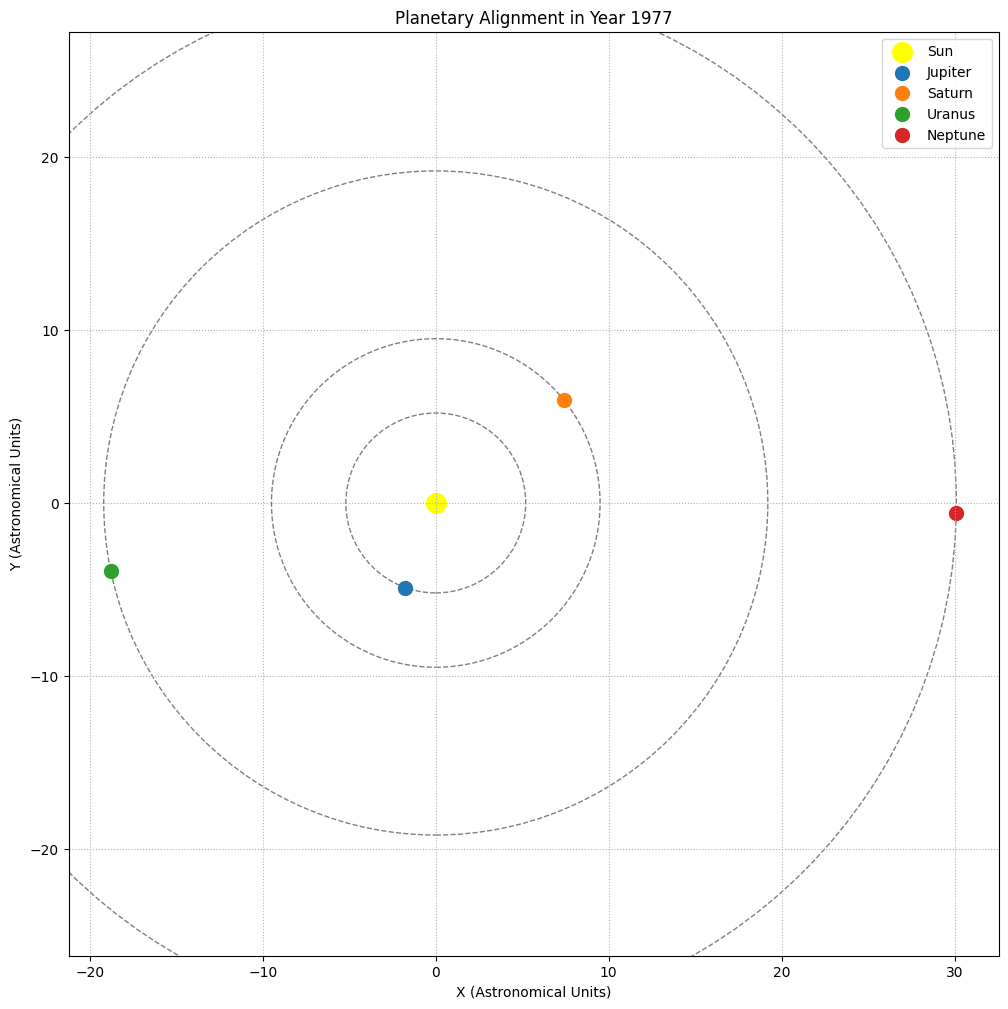

Relative Planetary Velocities:
Jupiter - Saturn:
  Relative Velocity: 14.2038
  Relative Angle: 211.26°
Jupiter - Uranus:
  Relative Velocity: 17.0488
  Relative Angle: 58.27°
Jupiter - Neptune:
  Relative Velocity: 32.1575
  Relative Angle: 108.83°
Saturn - Jupiter:
  Relative Velocity: 14.2038
  Relative Angle: 211.26°
Saturn - Uranus:
  Relative Velocity: 27.9982
  Relative Angle: 152.99°
Saturn - Neptune:
  Relative Velocity: 23.6129
  Relative Angle: 320.09°
Uranus - Jupiter:
  Relative Velocity: 17.0488
  Relative Angle: 58.27°
Uranus - Saturn:
  Relative Velocity: 27.9982
  Relative Angle: 152.99°
Uranus - Neptune:
  Relative Velocity: 49.0034
  Relative Angle: 167.10°
Neptune - Jupiter:
  Relative Velocity: 32.1575
  Relative Angle: 108.83°
Neptune - Saturn:
  Relative Velocity: 23.6129
  Relative Angle: 320.09°
Neptune - Uranus:
  Relative Velocity: 49.0034
  Relative Angle: 167.10°

Analyzing Year 2000:


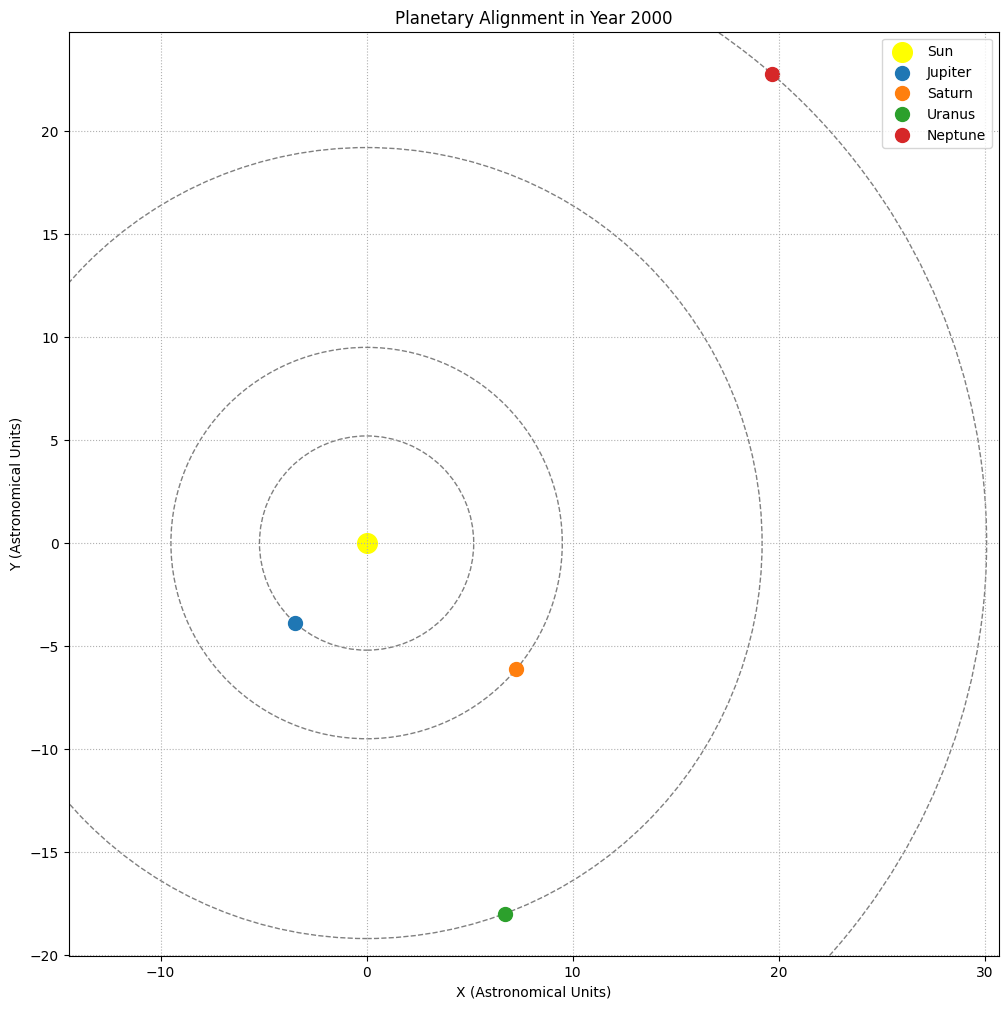

Relative Planetary Velocities:
Jupiter - Saturn:
  Relative Velocity: 10.9610
  Relative Angle: 91.66°
Jupiter - Uranus:
  Relative Velocity: 17.3892
  Relative Angle: 62.15°
Jupiter - Neptune:
  Relative Velocity: 35.2994
  Relative Angle: 179.07°
Saturn - Jupiter:
  Relative Velocity: 10.9610
  Relative Angle: 91.66°
Saturn - Uranus:
  Relative Velocity: 11.8919
  Relative Angle: 29.51°
Saturn - Neptune:
  Relative Velocity: 31.4493
  Relative Angle: 270.72°
Uranus - Jupiter:
  Relative Velocity: 17.3892
  Relative Angle: 62.15°
Uranus - Saturn:
  Relative Velocity: 11.8919
  Relative Angle: 29.51°
Uranus - Neptune:
  Relative Velocity: 42.7935
  Relative Angle: 241.21°
Neptune - Jupiter:
  Relative Velocity: 35.2994
  Relative Angle: 179.07°
Neptune - Saturn:
  Relative Velocity: 31.4493
  Relative Angle: 270.72°
Neptune - Uranus:
  Relative Velocity: 42.7935
  Relative Angle: 241.21°

Analyzing Year 2050:


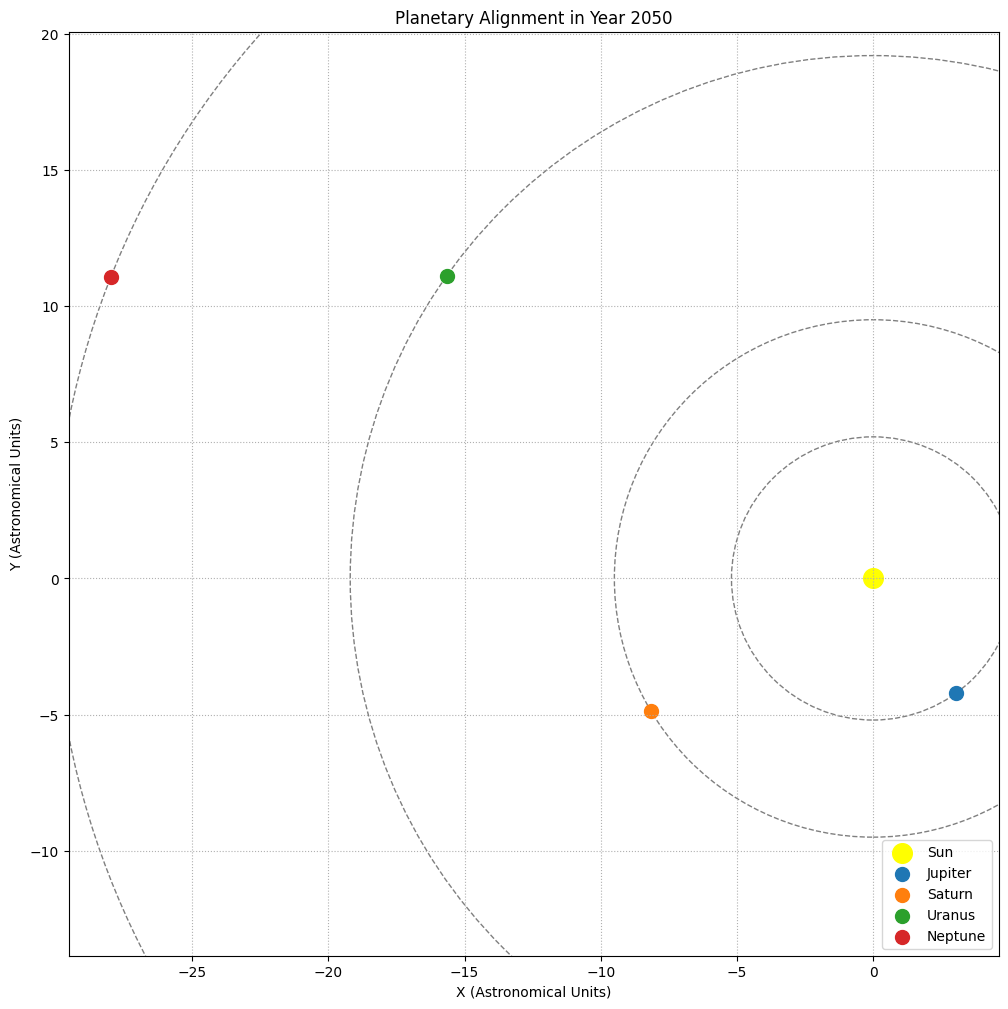

Relative Planetary Velocities:
Jupiter - Saturn:
  Relative Velocity: 11.2246
  Relative Angle: 95.05°
Jupiter - Uranus:
  Relative Velocity: 24.1831
  Relative Angle: 161.30°
Jupiter - Neptune:
  Relative Velocity: 34.6004
  Relative Angle: 147.54°
Saturn - Jupiter:
  Relative Velocity: 11.2246
  Relative Angle: 95.05°
Saturn - Uranus:
  Relative Velocity: 17.6623
  Relative Angle: 66.25°
Saturn - Neptune:
  Relative Velocity: 25.4563
  Relative Angle: 52.49°
Uranus - Jupiter:
  Relative Velocity: 24.1831
  Relative Angle: 161.30°
Uranus - Saturn:
  Relative Velocity: 17.6623
  Relative Angle: 66.25°
Uranus - Neptune:
  Relative Velocity: 12.3278
  Relative Angle: 13.76°
Neptune - Jupiter:
  Relative Velocity: 34.6004
  Relative Angle: 147.54°
Neptune - Saturn:
  Relative Velocity: 25.4563
  Relative Angle: 52.49°
Neptune - Uranus:
  Relative Velocity: 12.3278
  Relative Angle: 13.76°

Analyzing Year 2100:


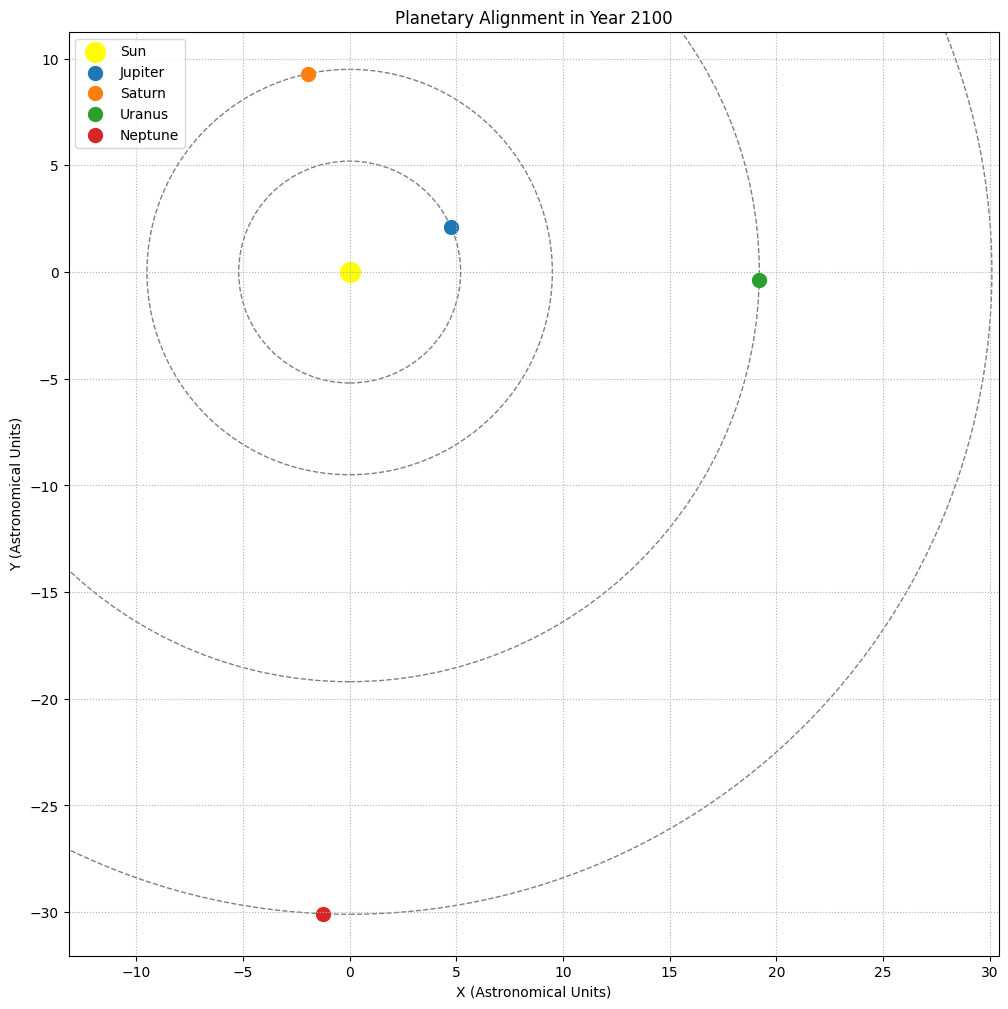

Relative Planetary Velocities:
Jupiter - Saturn:
  Relative Velocity: 9.8565
  Relative Angle: 78.24°
Jupiter - Uranus:
  Relative Velocity: 14.6403
  Relative Angle: 335.25°
Jupiter - Neptune:
  Relative Velocity: 32.7165
  Relative Angle: 243.98°
Saturn - Jupiter:
  Relative Velocity: 9.8565
  Relative Angle: 78.24°
Saturn - Uranus:
  Relative Velocity: 23.2565
  Relative Angle: 257.01°
Saturn - Neptune:
  Relative Velocity: 39.3770
  Relative Angle: 165.74°
Uranus - Jupiter:
  Relative Velocity: 14.6403
  Relative Angle: 335.25°
Uranus - Saturn:
  Relative Velocity: 23.2565
  Relative Angle: 257.01°
Uranus - Neptune:
  Relative Velocity: 36.0597
  Relative Angle: 91.27°
Neptune - Jupiter:
  Relative Velocity: 32.7165
  Relative Angle: 243.98°
Neptune - Saturn:
  Relative Velocity: 39.3770
  Relative Angle: 165.74°
Neptune - Uranus:
  Relative Velocity: 36.0597
  Relative Angle: 91.27°


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PlanetaryAlignmentDynamics:
    def __init__(self):
        # Orbital parameters of outer planets
        self.planets = {
            'Jupiter': {'period': 11.86, 'distance': 5.2, 'mass': 1.898e27},
            'Saturn': {'period': 29.46, 'distance': 9.5, 'mass': 5.683e26},
            'Uranus': {'period': 84.01, 'distance': 19.2, 'mass': 8.681e25},
            'Neptune': {'period': 164.79, 'distance': 30.1, 'mass': 1.024e26}
        }

    def calculate_orbital_geometry(self, reference_year):
        """
        Calculate planetary positions and relative geometries
        """
        planet_positions = {}
        for planet, params in self.planets.items():
            # Calculate orbital position
            angle = (reference_year % params['period']) / params['period'] * 2 * np.pi
            x = params['distance'] * np.cos(angle)
            y = params['distance'] * np.sin(angle)
            planet_positions[planet] = {
                'x': x,
                'y': y,
                'angle': np.degrees(angle)
            }

        return planet_positions

    def calculate_relative_velocities(self, planet_positions):
        """
        Compute relative velocities and alignment potential
        """
        velocities = {}
        for planet1, pos1 in planet_positions.items():
            for planet2, pos2 in planet_positions.items():
                if planet1 != planet2:
                    # Calculate relative velocity vector
                    dx = pos2['x'] - pos1['x']
                    dy = pos2['y'] - pos1['y']
                    relative_velocity = np.sqrt(dx**2 + dy**2)

                    # Calculate angle between planets
                    relative_angle = np.abs(pos1['angle'] - pos2['angle'])

                    velocities[(planet1, planet2)] = {
                        'relative_velocity': relative_velocity,
                        'relative_angle': relative_angle
                    }

        return velocities

    def visualize_planetary_alignment(self, reference_year):
        """
        Visualize planetary positions and potential alignments
        """
        # Calculate planetary positions
        positions = self.calculate_orbital_geometry(reference_year)

        # Create visualization
        plt.figure(figsize=(12, 12))
        plt.title(f'Planetary Alignment in Year {reference_year}')

        # Plot Sun at center
        plt.scatter(0, 0, color='yellow', s=200, label='Sun')

        # Plot planetary orbits and positions
        for planet, pos in positions.items():
            # Plot orbit
            orbit_radius = self.planets[planet]['distance']
            circle = plt.Circle((0, 0), orbit_radius, fill=False, linestyle='--', alpha=0.5)
            plt.gca().add_artist(circle)

            # Plot planet position
            plt.scatter(pos['x'], pos['y'], label=planet, s=100)

        plt.xlabel('X (Astronomical Units)')
        plt.ylabel('Y (Astronomical Units)')
        plt.axis('equal')
        plt.legend()
        plt.grid(True, linestyle=':')
        plt.show()

        # Calculate and return relative velocities
        return self.calculate_relative_velocities(positions)

# Simulate alignment dynamics
alignment_sim = PlanetaryAlignmentDynamics()

# Visualize alignment for specific years
print("Planetary Alignment Analysis:")
years_to_check = [1977, 2000, 2050, 2100]

for year in years_to_check:
    print(f"\nAnalyzing Year {year}:")
    relative_velocities = alignment_sim.visualize_planetary_alignment(year)

    print("Relative Planetary Velocities:")
    for (planet1, planet2), data in relative_velocities.items():
        print(f"{planet1} - {planet2}:")
        print(f"  Relative Velocity: {data['relative_velocity']:.4f}")
        print(f"  Relative Angle: {data['relative_angle']:.2f}°")

In [ ]:
class Voyager2VelocityAnalysis:
    def __init__(self):
        # Initial mission parameters
        self.initial_velocity = 10.0  # km/s before Jupiter

        # Planetary encounters and velocity gains
        self.encounters = [
            {'planet': 'Jupiter', 'velocity_gain': 3.9},
            {'planet': 'Saturn', 'velocity_gain': 2.0},
            {'planet': 'Uranus', 'velocity_gain': 1.5},
            {'planet': 'Neptune', 'velocity_gain': 1.1}
        ]

    def calculate_total_velocity_gain(self):
        """
        Calculate total velocity gain from planetary encounters
        """
        total_gain = sum(encounter['velocity_gain'] for encounter in self.encounters)
        total_velocity = self.initial_velocity + total_gain

        return {
            'initial_velocity': self.initial_velocity,
            'total_velocity_gain': total_gain,
            'final_velocity': total_velocity,
            'encounter_details': self.encounters
        }

# Run the analysis
velocity_analysis = Voyager2VelocityAnalysis()
results = velocity_analysis.calculate_total_velocity_gain()

print("Voyager 2 Velocity Analysis:")
print(f"Initial Velocity: {results['initial_velocity']} km/s")
print(f"Total Velocity Gain: {results['total_velocity_gain']} km/s")
print(f"Final Velocity: {results['final_velocity']} km/s")

print("\nPlanetary Encounter Details:")
for encounter in results['encounter_details']:
    print(f"{encounter['planet']}: {encounter['velocity_gain']} km/s")

Voyager 2 Velocity Analysis:
Initial Velocity: 10.0 km/s
Total Velocity Gain: 8.5 km/s
Final Velocity: 18.5 km/s

Planetary Encounter Details:
Jupiter: 3.9 km/s
Saturn: 2.0 km/s
Uranus: 1.5 km/s
Neptune: 1.1 km/s


In [ ]:
import numpy as np

class VoyagerTrajectoryComparison:
    def __init__(self):
        # Constants
        self.G = 6.67430e-11  # Gravitational constant
        self.M_sun = 1.989e30  # Solar mass

        # Initial conditions
        self.initial_velocity = 10.0  # km/s
        self.launch_date = 1977
        self.current_year = 2024
        self.mission_duration = self.current_year - self.launch_date

    def calculate_no_assist_trajectory(self):
        """
        Calculate trajectory without gravity assists
        """
        # Simplified solar orbital mechanics
        initial_distance = 1  # AU

        # Basic orbital velocity calculation
        orbital_velocity = np.sqrt(self.G * self.M_sun / (initial_distance * 1.496e8))  # Convert AU to km

        # Minimal velocity change
        final_velocity = self.initial_velocity + 2.0  # Conservative estimate

        # Distance calculation (simplified)
        average_velocity = (self.initial_velocity + final_velocity) / 2
        total_distance = average_velocity * (self.mission_duration * 365.25 * 24 * 3600)  # seconds

        return {
            'final_velocity': final_velocity,
            'total_distance': total_distance / 1.496e8,  # Convert to AU
            'mission_duration': self.mission_duration
        }

# Run the calculation
trajectory_sim = VoyagerTrajectoryComparison()
no_assist_results = trajectory_sim.calculate_no_assist_trajectory()

print("Voyager 2 Hypothetical No-Gravity-Assist Trajectory:")
print(f"Estimated Current Velocity: {no_assist_results['final_velocity']:.2f} km/s")
print(f"Estimated Distance from Earth: {no_assist_results['total_distance']:.2f} AU")
print(f"Mission Duration: {no_assist_results['mission_duration']} years")

Voyager 2 Hypothetical No-Gravity-Assist Trajectory:
Estimated Current Velocity: 12.00 km/s
Estimated Distance from Earth: 109.06 AU
Mission Duration: 47 years


In [2]:
import numpy as np

class VoyagerTrajectoryComparison:
    def __init__(self):
        # Constants
        self.G = 6.67430e-11  # Gravitational constant
        self.M_sun = 1.989e30  # Solar mass

        # Initial conditions
        self.initial_velocity = 10.0  # km/s
        self.launch_date = 1977
        self.current_year = 2024
        self.mission_duration = self.current_year - self.launch_date

    def calculate_no_assist_trajectory(self):
        """
        More detailed trajectory calculation without gravity assists
        """
        # Solar escape velocity at 1 AU
        escape_velocity = np.sqrt(2 * self.G * self.M_sun / (1.496e8))  # m/s
        escape_velocity_km_s = escape_velocity / 1000

        # Conservative velocity gain
        final_velocity = self.initial_velocity + 2.0  # km/s

        # Distance calculation with more precise orbital mechanics
        average_velocity = (self.initial_velocity + final_velocity) / 2
        total_seconds = self.mission_duration * 365.25 * 24 * 3600
        total_distance = average_velocity * total_seconds / 1.496e8  # Convert to AU

        return {
            'initial_velocity': self.initial_velocity,
            'final_velocity': final_velocity,
            'escape_velocity': escape_velocity_km_s,
            'total_distance': total_distance,
            'mission_duration': self.mission_duration
        }

# Run the calculation
trajectory_sim = VoyagerTrajectoryComparison()
no_assist_results = trajectory_sim.calculate_no_assist_trajectory()

print("Voyager 2 Hypothetical No-Gravity-Assist Trajectory:")
print(f"Initial Velocity: {no_assist_results['initial_velocity']:.2f} km/s")
print(f"Estimated Current Velocity: {no_assist_results['final_velocity']:.2f} km/s")
print(f"Solar Escape Velocity at 1 AU: {no_assist_results['escape_velocity']:.2f} km/s")
print(f"Estimated Distance from Earth: {no_assist_results['total_distance']:.2f} AU")
print(f"Mission Duration: {no_assist_results['mission_duration']} years")

Voyager 2 Hypothetical No-Gravity-Assist Trajectory:
Initial Velocity: 10.00 km/s
Estimated Current Velocity: 12.00 km/s
Solar Escape Velocity at 1 AU: 1332.20 km/s
Estimated Distance from Earth: 109.06 AU
Mission Duration: 47 years
